# RSF AGENCY SKILL TEST

## Section 1: General Data Analysis

*data source:* https://raw.githubusercontent.com/ringoquimico/Proyectos/refs/heads/main/AM3%20TEST/01_test_B/00_data_sources/model_performance_raw.csv


### 1. LIBRARIES

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### 2. DATA SOURCE

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ringoquimico/Proyectos/refs/heads/main/AM3%20TEST/01_test_B/00_data_sources/model_performance_raw.csv", sep=';', thousands=',', decimal='.')
df.head()

,Date,Model Name,Net Sales,Fans Gained,Agency
0,2025-01-01,Model 15,"$3,804.19",535.0,R
1,2025-01-01,Model 5,"$2,098.22",169.0,R
2,2025-01-01,Model 6,"$1,984.68",349.0,R
3,2025-01-01,Model 9,$115.94,28.0,R
4,2025-01-01,Model 10,$766.83,120.0,R


### 3. DATA CLEANING

In [35]:

#Transform 'Net Sales' column to numeric
df['Net Sales'] = df['Net Sales'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Net Sales'] = df['Net Sales'].fillna(0)

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


df.head()

,Date,Model Name,Net Sales,Fans Gained,Agency
0,2025-01-01,Model 15,3804.19,535.0,R
1,2025-01-01,Model 5,2098.22,169.0,R
2,2025-01-01,Model 6,1984.68,349.0,R
3,2025-01-01,Model 9,115.94,28.0,R
4,2025-01-01,Model 10,766.83,120.0,R


### 4. ANALYSIS OF GENERAL DATA

### 4.1. Models Performance Evaluation (Net Sales and Fans Growth)

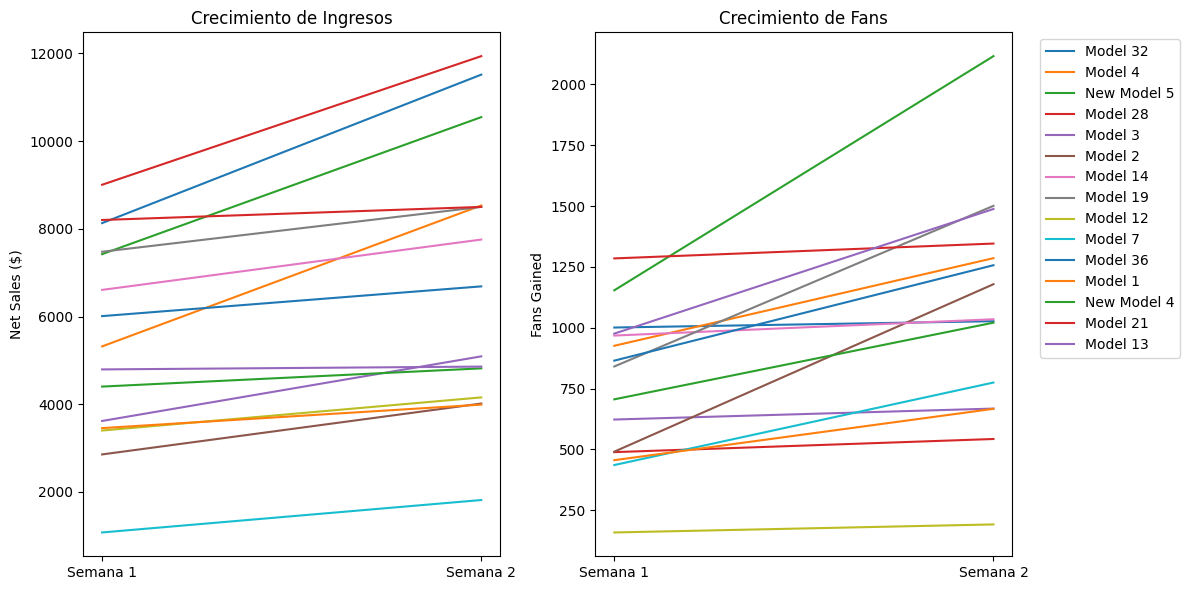

In [36]:
#######################################################################################################
# GROUPING AND COMPARISON OF MODEL PERFORMANCE
#######################################################################################################

# Definir los períodos
period1_start = '2025-02-17'
period1_end = '2025-02-23'
period2_start = '2025-02-24'
period2_end = '2025-03-02'

# Filtrar datos para cada período
period1 = df[(df['Date'] >= period1_start) & (df['Date'] <= period1_end)]
period2 = df[(df['Date'] >= period2_start) & (df['Date'] <= period2_end)]

# Agrupar por modelo y sumar métricas para cada período
grouped_p1 = period1.groupby('Model Name').agg({'Net Sales': 'sum', 'Fans Gained': 'sum'})
grouped_p2 = period2.groupby('Model Name').agg({'Net Sales': 'sum', 'Fans Gained': 'sum'})

# Calcular diferencias entre períodos
comparison = grouped_p2 - grouped_p1
comparison.columns = ['Net Sales Growth', 'Fans Growth']

# Filtrar modelos con crecimiento positivo en ambas métricas
positive_trend_models = comparison[(comparison['Net Sales Growth'] > 0) & (comparison['Fans Growth'] > 0)]
positive_trend_models = positive_trend_models.sort_values('Net Sales Growth', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
for model in positive_trend_models.index:
    sales = [grouped_p1.loc[model, 'Net Sales'], grouped_p2.loc[model, 'Net Sales']]
    fans = [grouped_p1.loc[model, 'Fans Gained'], grouped_p2.loc[model, 'Fans Gained']]
    
    plt.subplot(1, 2, 1)
    plt.plot(['Semana 1', 'Semana 2'], sales, label=model)
    plt.title('Crecimiento de Ingresos')
    plt.ylabel('Net Sales ($)')
    
    plt.subplot(1, 2, 2)
    plt.plot(['Semana 1', 'Semana 2'], fans, label=model)
    plt.title('Crecimiento de Fans')
    plt.ylabel('Fans Gained')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Models in this graph represent those with a positive trend in both variables. New Model 5 is a hit...

In [37]:
comparison.dropna(inplace=True)
comparison['Positive Trend'] = (comparison['Net Sales Growth'] > 0) & (comparison['Fans Growth'] > 0)
comparison

,Net Sales Growth,Fans Growth,Positive Trend
Model Name,,,
Model 1,535.48,211.0,True
Model 10,-907.77,352.0,False
Model 11,-3115.20,85.0,False
Model 12,755.20,33.0,True
Model 13,64.25,512.0,True
Model 14,1148.04,67.0,True
Model 15,-1655.94,426.0,False
Model 16,-6944.17,-115.0,False
Model 17,-995.85,-306.0,False


### 4.2. New Models vs. Existing Models

In [38]:
###################################################################################################################
# T-test for comparing means of two independent samples (Existing Model vs New Model)
###################################################################################################################


# Clean Net Sales column if it contains $ and commas
if df['Net Sales'].dtype == object:
    df['Net Sales'] = df['Net Sales'].str.replace('$', '').str.replace(',', '').astype(float)

# Create boolean mask for new models (handle NaN values in Model Name)
df['Is New'] = df['Model Name'].notna() & df['Model Name'].str.startswith('New Model', na=False)

# Calculate basic statistics separately (with proper NaN handling)
new_stats = df.loc[df['Is New'], ['Net Sales', 'Fans Gained']].describe()
existing_stats = df.loc[~df['Is New'], ['Net Sales', 'Fans Gained']].describe()

# Perform t-tests with proper NaN handling and equal_var=False for unequal sample sizes
def safe_ttest(group1, group2):
    """Handle t-test with NaN removal and unequal sample sizes"""
    group1_clean = group1.dropna()
    group2_clean = group2.dropna()
    if len(group1_clean) == 0 or len(group2_clean) == 0:
        return (np.nan, np.nan)
    return ttest_ind(group1_clean, group2_clean, equal_var=False)

# Get the groups
new_models = df[df['Is New']]
existing_models = df[~df['Is New']]

# Perform tests
t_stat_sales, p_val_sales = safe_ttest(new_models['Net Sales'], existing_models['Net Sales'])
t_stat_fans, p_val_fans = safe_ttest(new_models['Fans Gained'], existing_models['Fans Gained'])

# Print results with interpretation
print("=== Basic Statistics ===")
print("New Models:\n", new_stats)
print("\nExisting Models:\n", existing_stats)

print("\n=== T-Test Results ===")
print(f"Net Sales - t-stat: {t_stat_sales:.2f}, p-value: {p_val_sales:.4f}")
print(f"Fans Gained - t-stat: {t_stat_fans:.2f}, p-value: {p_val_fans:.4f}")

# Automatic interpretation
def interpret_test(metric, t_stat, p_val):
    if np.isnan(t_stat) or np.isnan(p_val):
        print(f"\nCould not perform test for {metric} - insufficient valid data")
        return
    
    significance = "IS" if p_val < 0.05 else "IS NOT"
    direction = "higher" if t_stat > 0 else "lower"
    print(f"\nInterpretation for {metric}:")
    print(f"- The difference in {metric} between new and existing models {significance} statistically significant (p = {p_val:.4f})")
    if p_val < 0.05:
        print(f"- New models have {direction} average {metric} (t = {t_stat:.2f})")

interpret_test("Net Sales", t_stat_sales, p_val_sales)
interpret_test("Fans Gained", t_stat_fans, p_val_fans)

=== Basic Statistics ===
New Models:
          Net Sales  Fans Gained
count   115.000000   114.000000
mean   1026.365913   134.377193
std     764.510515   188.727335
min       0.000000     0.000000
25%     494.270000    30.000000
50%     820.810000    63.000000
75%    1275.630000   134.500000
max    3525.250000   882.000000

Existing Models:
          Net Sales  Fans Gained
count  2318.000000  2176.000000
mean   1356.317748   166.765625
std    1307.034369   183.744336
min       0.000000     0.000000
25%     522.467500    52.000000
50%    1003.495000   120.000000
75%    1710.617500   237.250000
max    8437.560000  4965.000000

=== T-Test Results ===
Net Sales - t-stat: -4.33, p-value: 0.0000
Fans Gained - t-stat: -1.79, p-value: 0.0761

Interpretation for Net Sales:
- The difference in Net Sales between new and existing models IS statistically significant (p = 0.0000)
- New models have lower average Net Sales (t = -4.33)

Interpretation for Fans Gained:
- The difference in Fans Gained b

The results indicate that there is no difference in both groups of models for fans gaining, but for Net sales there are a significant difference, so, new models need to be more efficients in order to improve the sales.

### 4.3. Data-Driven Approach to Key Challenges

Challenge 1: Managing Unresponsive Fans
Data-Driven Solutions:

Engagement Segmentation

Calculate response rates (e.g., messages replied to vs. ignored) per fan/model.

- Use clustering (e.g., K-means) to group fans into segments:

        Active: High response rate, frequent interactions

        Passive: Low response rate but occasional engagement

        Inactive: No response despite outreach

In [39]:
# Example: Segment fans by response rate (if response data exists)
#from sklearn.cluster import KMeans
#fan_data = df.groupby('Fan ID').agg({'Response_Rate': 'mean', 'Interaction_Count': 'sum'}).dropna()
#kmeans = KMeans(n_clusters=3).fit(fan_data)
#fan_data['Segment'] = kmeans.labels_

Challenge 2: Handling Pricing Objections

Price Sensitivity Analysis

A) Calculate elasticity: % change in fan conversions vs. % change in pricing tiers.

    Identify "sweet spots" where revenue and fan growth are balanced.

In [40]:
# Example: Elasticity approximation (if tiered pricing exists)
#price_tiers = df.groupby('Price_Tier').agg({'Net Sales': 'sum', 'Fans_Gained': 'sum'})
#price_tiers['Sales_per_Fan'] = price_tiers['Net Sales'] / price_tiers['Fans_Gained']

B) A/B Testing for Pricing: Test small price adjustments (e.g., ±10%) on similar audience segments. Measure impact on conversion rates and revenue.

Dynamic Pricing Models: Use ML (e.g., regression, classification (if data is labeled)) to recommend optimal prices per fan segment:

High-engagement fans: Premium pricing (less price-sensitive).

New fans: Discounted trials to reduce objections.